In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("chrisPP")

In [2]:
COCO_KEYPOINT_INDEXES = {
    0: 'nose',
    1: 'left_eye',
    2: 'right_eye',
    3: 'left_ear',
    4: 'right_ear',
    5: 'left_shoulder',
    6: 'right_shoulder',
    7: 'left_elbow',
    8: 'right_elbow',
    9: 'left_wrist',
    10: 'right_wrist',
    11: 'left_hip',
    12: 'right_hip',
    13: 'left_knee',
    14: 'right_knee',
    15: 'left_ankle',
    16: 'right_ankle'
}

In [3]:
DistTrack = pd.read_csv('distances_track.csv').drop(columns = "Unnamed: 0")

In [4]:
PATH = "plots/distance"
if not os.path.isdir(PATH):
    os.makedirs(PATH)

In [5]:
os.listdir()

['10',
 '10.csv',
 '9',
 '99.csv',
 '6.csv',
 '7',
 '3.csv',
 'saved_values.csv',
 '2.csv',
 'saved_distances.csv',
 '.~lock.distances_track.csv#',
 '8',
 '9.csv',
 '1.csv',
 '3',
 '99',
 '7.csv',
 '8.csv',
 '6',
 'plots',
 '2',
 'distances_track.csv',
 '1']

In [6]:
def check_instance(item):
    if item.isnumeric():
        if int(item)<90:
            return True
        else:
            return False
    else:
        return False

personIDs = list(set([x for x in os.listdir() if check_instance(x)]))
personIDs.sort(key=int)


In [7]:
personIDs

['1', '2', '3', '6', '7', '8', '9', '10']

In [8]:
# personIDs = ['1', '2', '3']

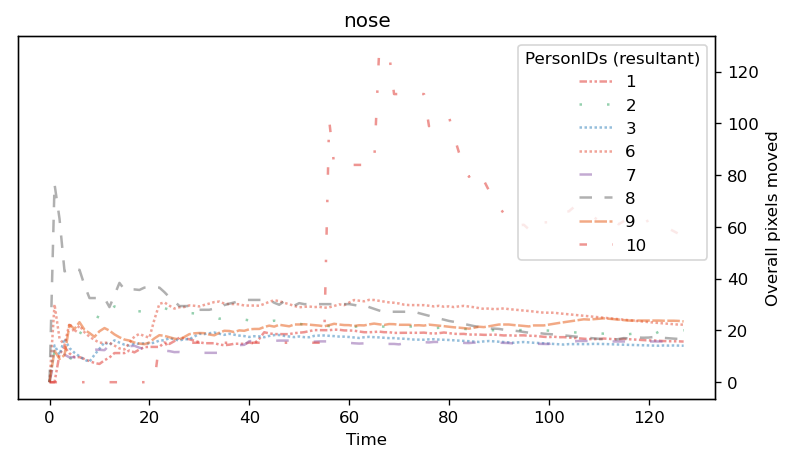

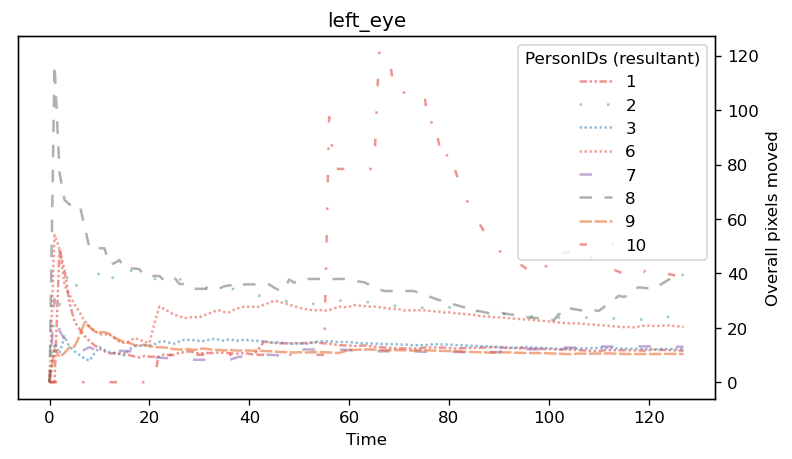

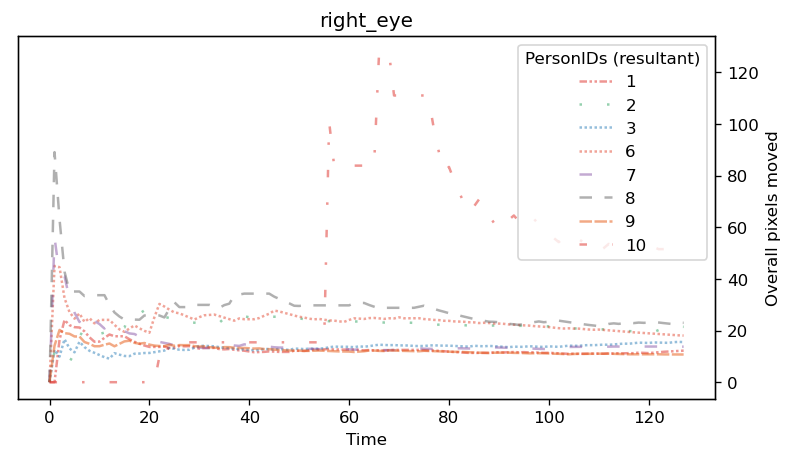

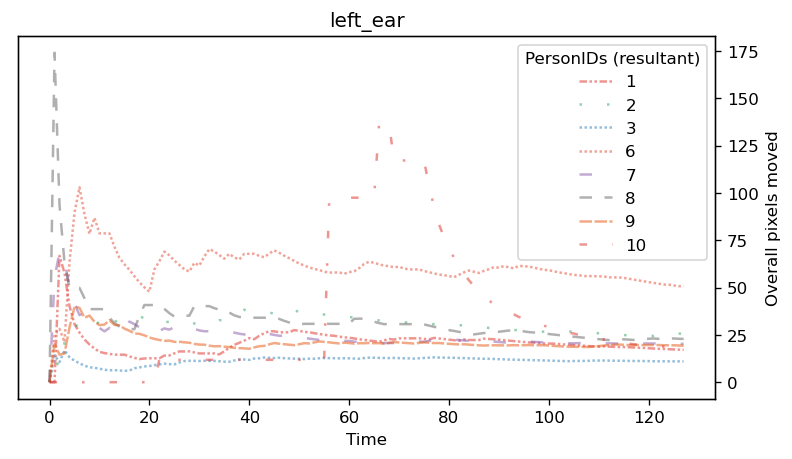

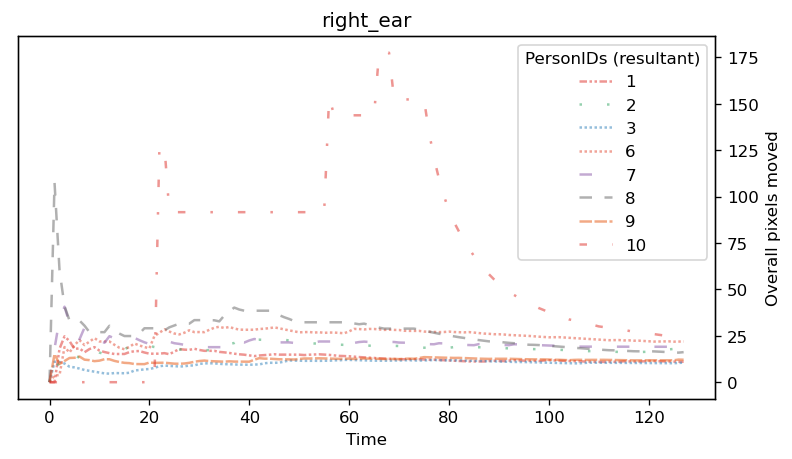

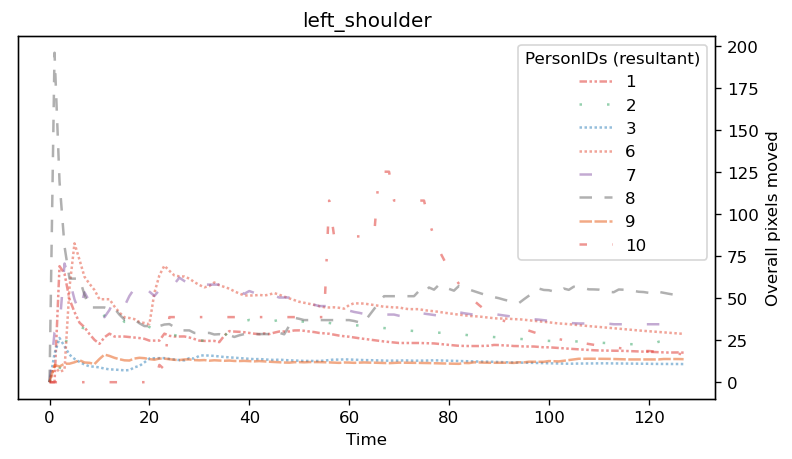

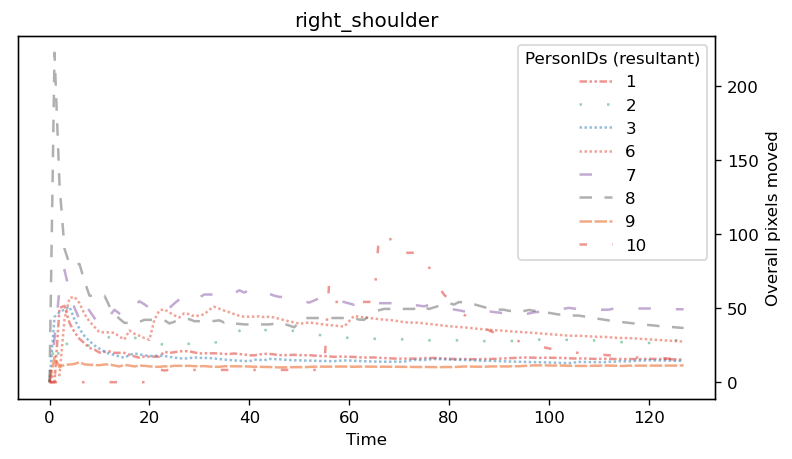

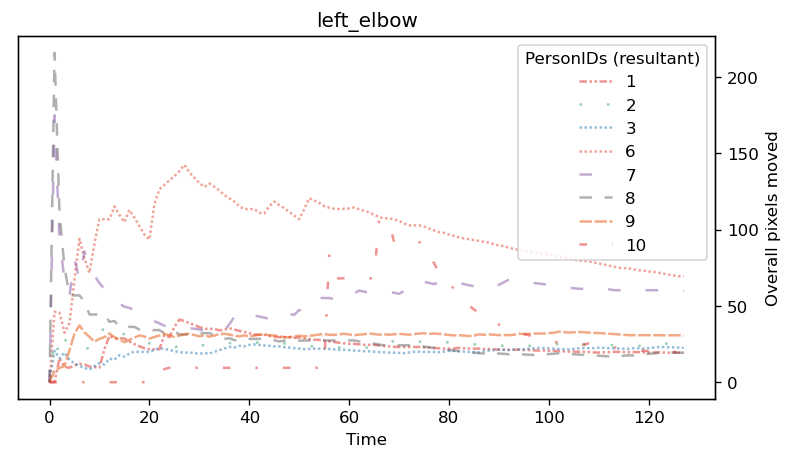

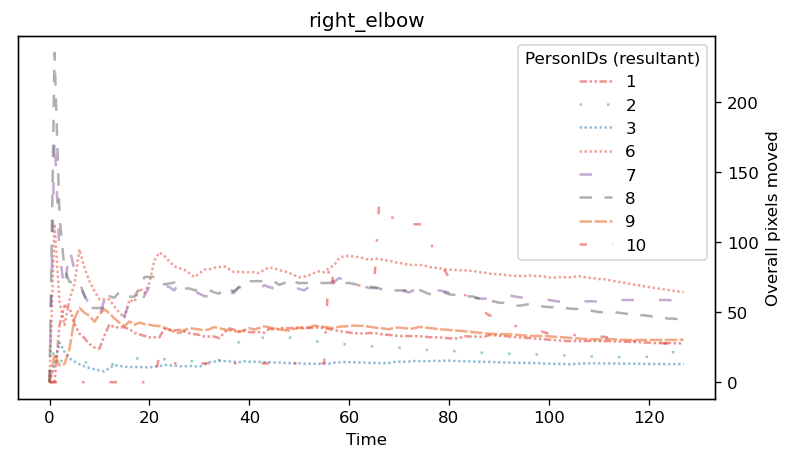

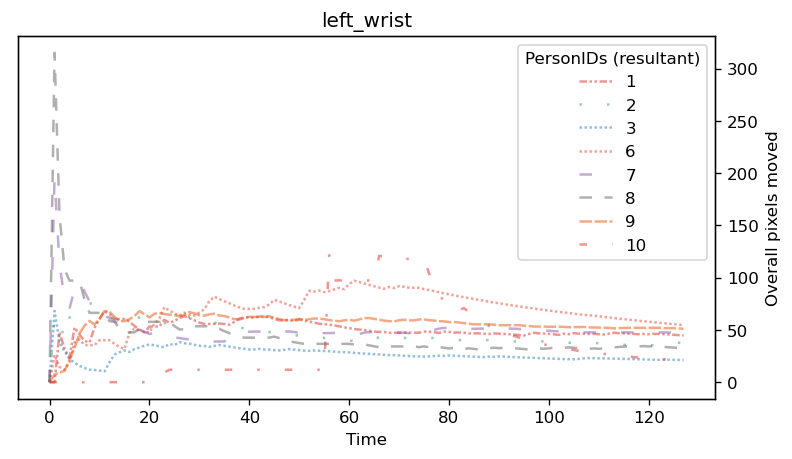

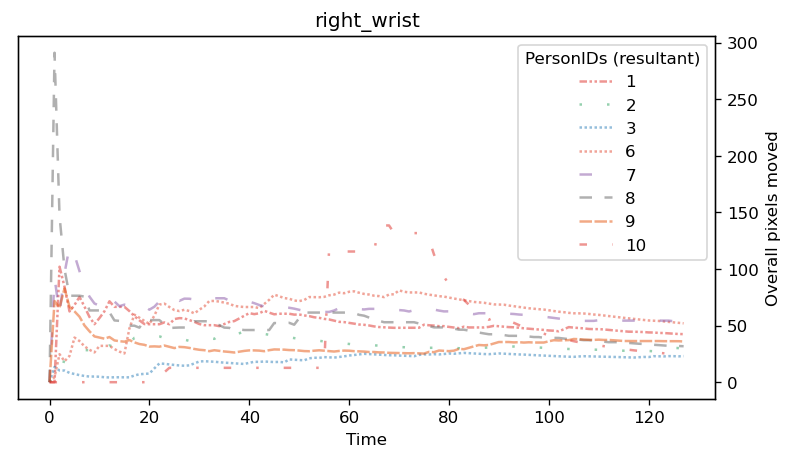

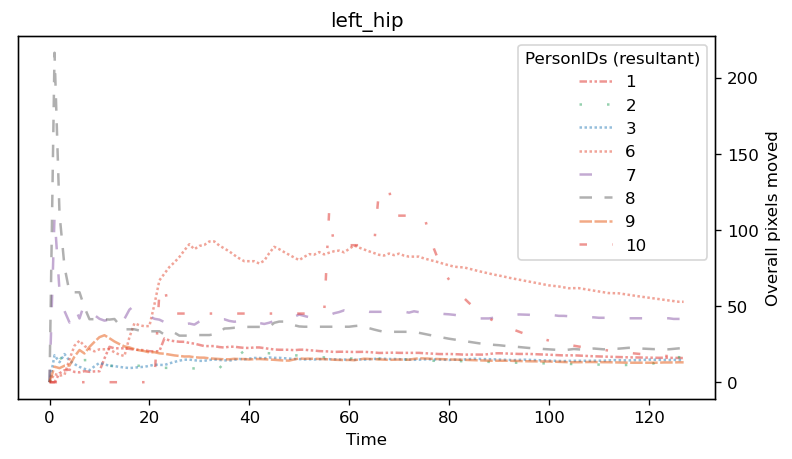

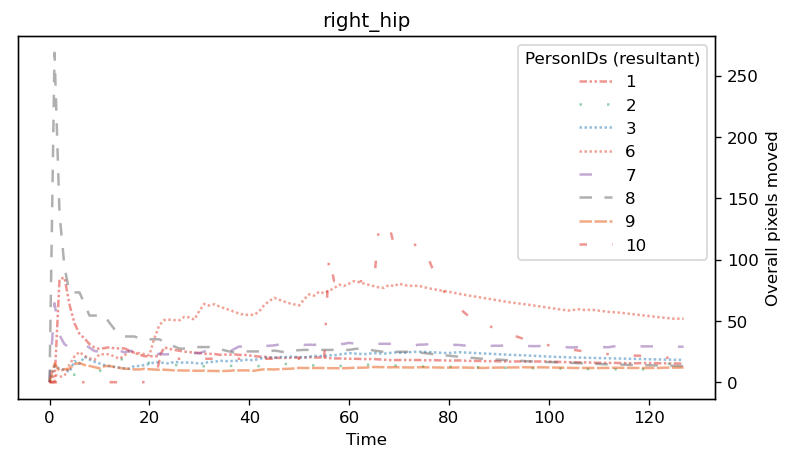

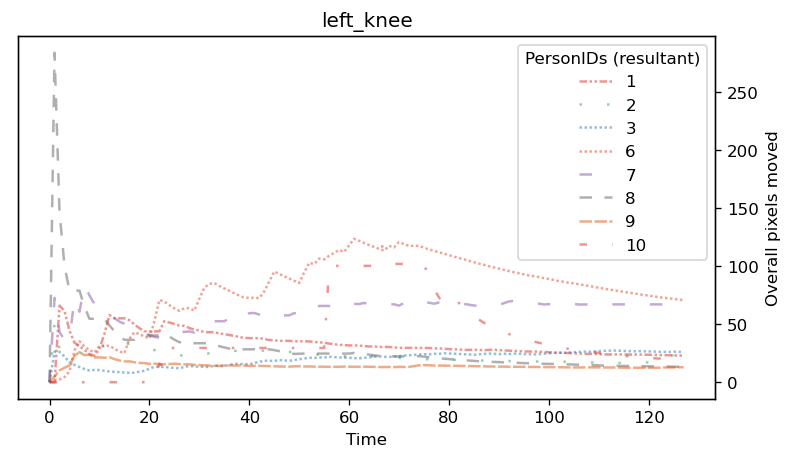

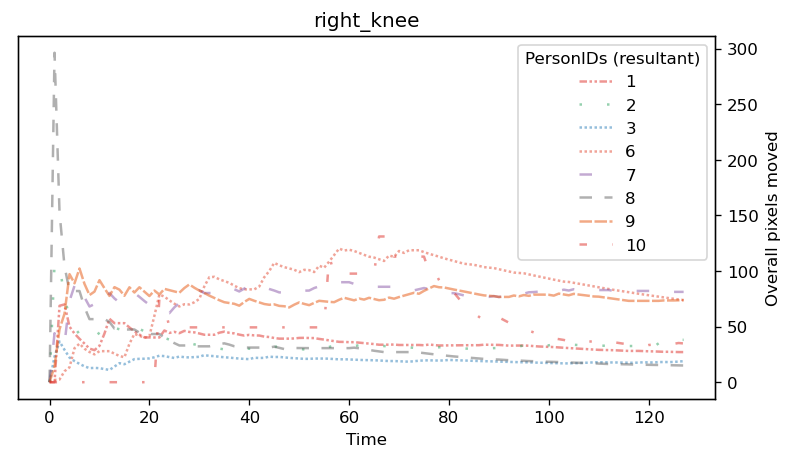

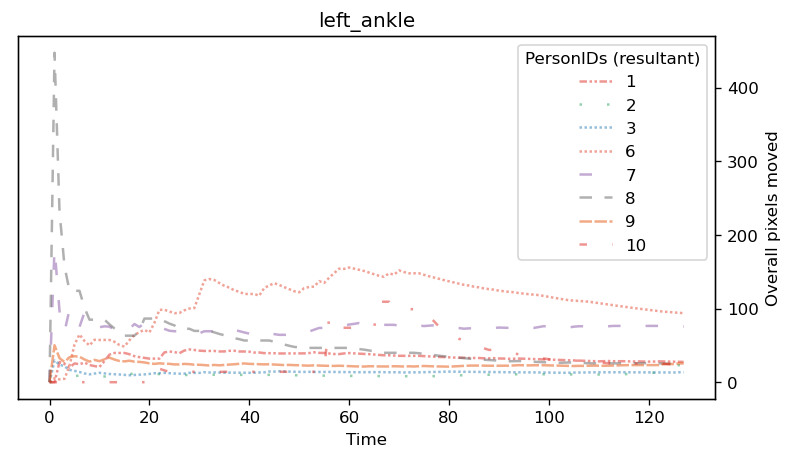

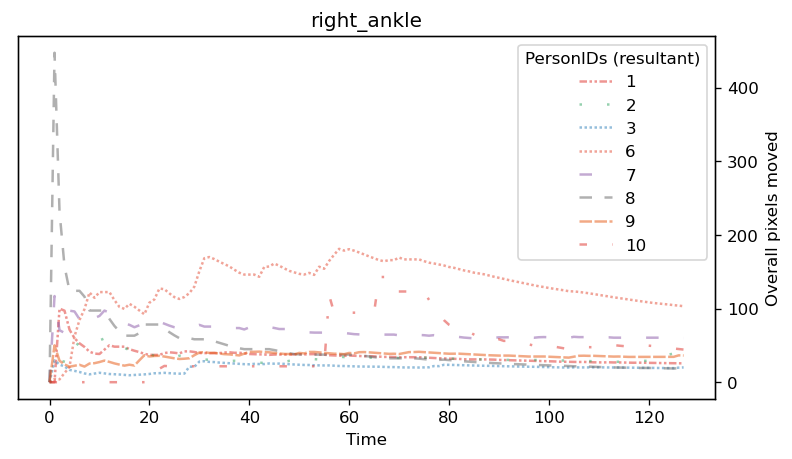

In [9]:

colors = ["#2ca25f","#2c7fb8", "#e34a33","#8856a7","#636363","#e6550d","#de2d26" ]
colorsLight = ["#a1d99b","#deebf7","#fdbb84"]
hatches = ["dashed", 
            "dashdot",
            "loosely dotted", 
            "loosely dashed", 
            "densely dashdotdotted",
            "dashdotdotted",
            "dashdotted"]

hatches = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
keypoinyIDs = range(17)

for keypointID in COCO_KEYPOINT_INDEXES.keys():
    filterKeypoint = DistTrack[[col for col in DistTrack.columns.to_list() if (int(col.split("_")[1])==keypointID) ]]
    plt.figure(figsize=(7.5,4),dpi = 120)
    ax = plt.subplot() 
    plt.title(COCO_KEYPOINT_INDEXES[keypointID])
    ax2 = ax.twinx()
        
    for personID in personIDs:
        filterPerson = filterKeypoint[[personID + "_" + str(keypointID)]]
        #plt.plot(
        values = filterPerson.values.flatten()
        # ax.plot(values, label = personID, color = colors[ personIDs.index(personID)-1])
        #list(range(len(values))),
        
        filterPersonr = filterKeypoint[[personID + "_" + str(keypointID) + "_r"]]
        valuesr = filterPersonr.values.flatten()
        ax2.plot(valuesr, label = personID, color = colors[ personIDs.index(personID)-1], alpha = 0.5, linestyle=hatches[ personIDs.index(personID)-1][::-1][0])

    ax.set_xlabel("Time")
    # ax.set_ylabel("Pixels moved")   
    ax2.set_ylabel("Overall pixels moved")   
    # ax.axhline(-1.5,0, color = "black")
    # ax.legend(title="PersonIDs", loc='upper left')
    ax2.legend(title="PersonIDs (resultant)", loc='upper right')
    ax.set_yticks([])
    plt.savefig(os.path.join(PATH, COCO_KEYPOINT_INDEXES[keypointID]))
    plt.show()     

In [ ]:
filterKeypoint

In [ ]:
col = "99_1_r"
len(col.split("_"))

In [ ]:
hatches[0][::-1][0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


ax0, ax1 = (plt.figure(figsize=(10, 8))
            .add_gridspec(2, 1, height_ratios=[1, 3])
            .subplots())

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.tight_layout()
plt.show()